# Oblig3

In [24]:
# opg1

import numpy as np
import matplotlib.pyplot as pl

def g(f, t):
    return 1 * np.sin(2 * np.pi * f * t)


def doFreqAn(func, f, fs, T):

    N = int(T * fs)  # tid * hvor mange per tid
    t = np.linspace(0, T, N)
    sampFunc = func(f, t)  # samplingen

    Ck = np.fft.fft(sampFunc) / N  # normalisert fft
    freq = np.fft.fftfreq(N, 1 / fs)

    return Ck, freq, sampFunc, t


# 1a)


def opg1(f, fs):

    Ck, freq, sampFunc, t = doFreqAn(g, f, fs, 1)

    pl.figure(figsize=(13, 7))

    pl.subplot(212)
    pl.plot(freq, np.abs(Ck))
    pl.xlabel("frequency")
    pl.ylabel("abs (Ck)")

    pl.subplot(211)
    pl.plot(t, sampFunc, label=f"f = {f}")
    pl.xlabel("time (s)")
    pl.ylabel("amplitude (m)")
    pl.legend(loc=1)

    pl.show()


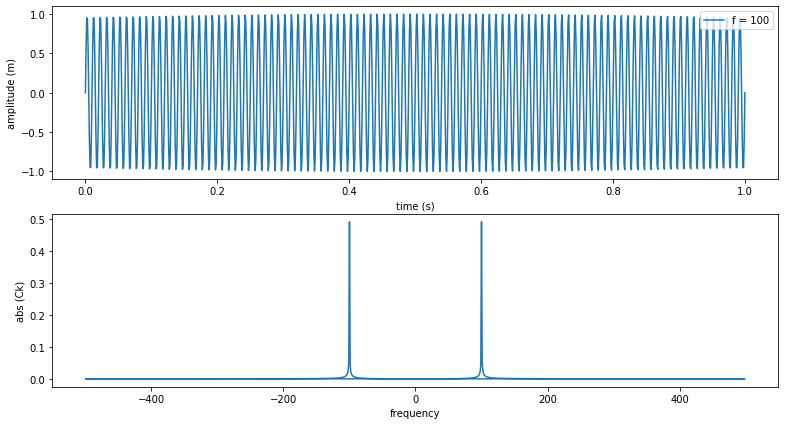

In [25]:
# 1a)

opg1(100, 1000)

Amplituden er som forventet, 0.5 for pos og neg frekvenser = 1.

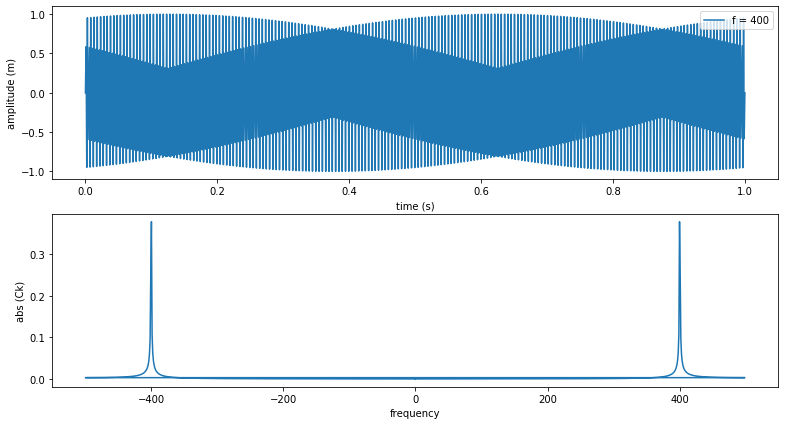

In [19]:
# 1b)

opg1(400, 1000)

Ser at frekvensen fft gir er fortsatt riktig siden den er mindre en fs/2 (nyquist-frekvensen).

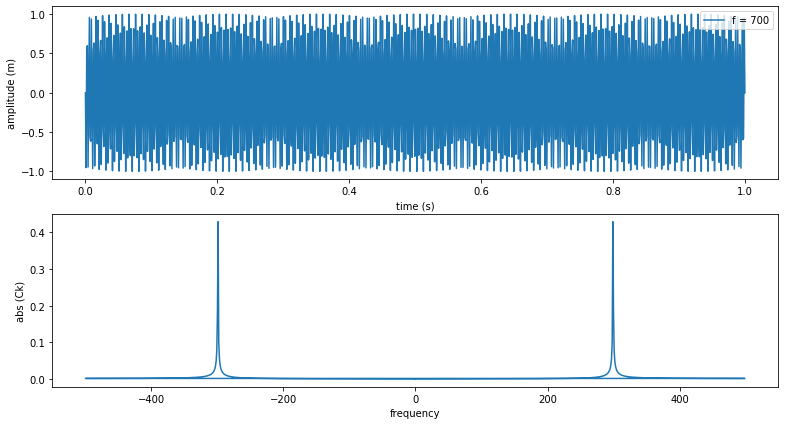

In [20]:
opg1(700, 1000)

Nå blir det veldig feil, den gir 300 Hz som frekvensen. Egentlig 300 og 700Hz. Den 300Hz frekvensen er en alias som kommer når 700Hz foldes over fs/2.

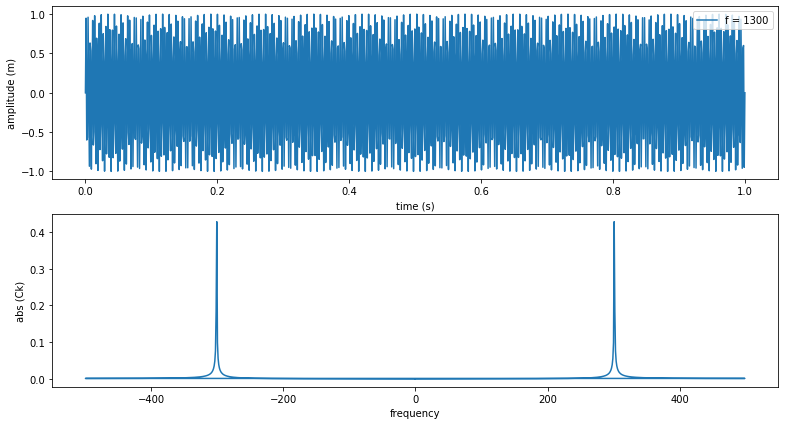

In [21]:
opg1(1300, 1000)

Aliaser av frekvens f finnes på (1) (f + n * fs) og (2) (fs-f + n * fs) hvor n er en int. Fra (1) 1300 - 1000 = 300, og fra (2) 1000-1300 + 1000 = 700. Så vi får 300Hz og 700Hz som aliaser.

2)

![opg2](attache/opg2.png)

In [27]:
N = 1000
t = np.linspace(0, 2*np.pi, N)
sin2 = np.sin(t)**2

sinfft = np.fft.fft(sin2)/N

print(f"Actual average: {np.sum(sin2)/N}")
print(f"a0: {sinfft[0]}")

Actual average: 0.49950000000000006
a0: (0.49950000000000006+0j)


Exactly the same.

In [17]:
# 3)

import numpy as np
import matplotlib.pyplot as pl


def doFreqAn2(func, fs=1000, T=1):

    N = int(T * fs)  # tid * hvor mange per tid
    t = np.linspace(0, T, N)
    sampFunc = func(t)  # samplingen

    Ck = np.fft.fft(sampFunc) / N  # normalisert fft
    freq = np.fft.fftfreq(N, 1 / fs)

    return t, sampFunc, Ck, freq


def f(t):
    return 1 * np.sin(2 * np.pi * 100 * t) * np.exp(
        -(((t - 0.2) / 0.05) ** 2)
    ) + 1.7 * np.sin(2 * np.pi * 160 * t) * np.exp(-(((t - 0.6) / 0.1) ** 2))

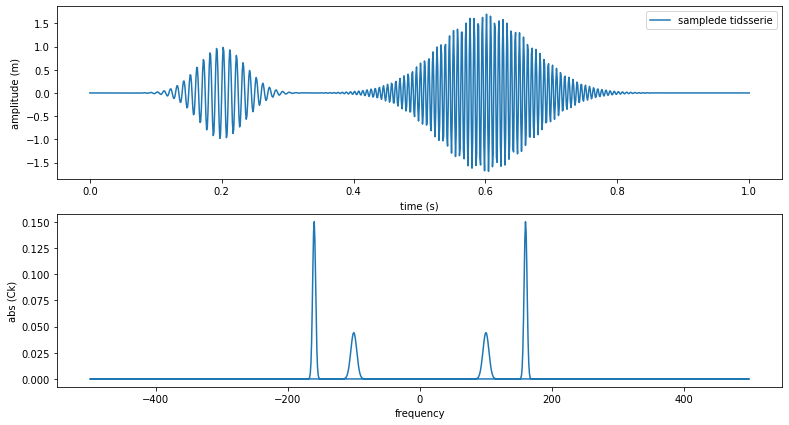

In [18]:
t, sampFunc, Ck, freq = doFreqAn2(f)

pl.figure(figsize=(13, 7))

pl.subplot(212)
pl.plot(freq, np.abs(Ck))
pl.xlabel("frequency")
pl.ylabel("abs (Ck)")

pl.subplot(211)
pl.plot(t, sampFunc, label="samplede tidsserie")
pl.xlabel("time (s)")
pl.ylabel("amplitude (m)")
pl.legend(loc=1)

pl.show()

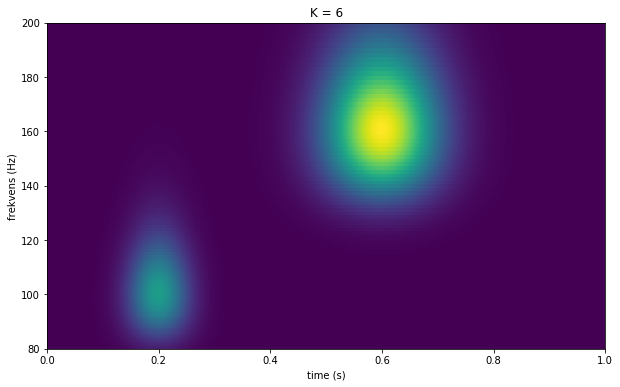

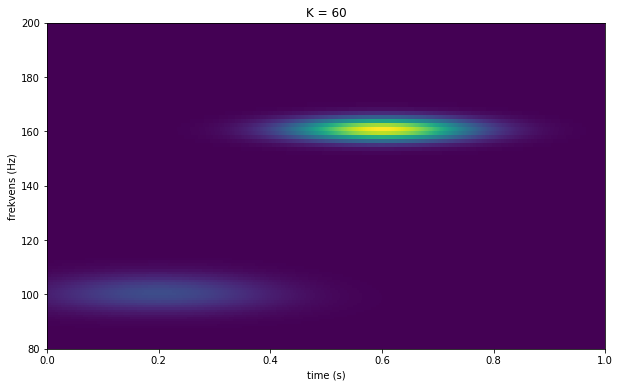

In [20]:

def wavelet(oma, K, tn, tk, T, fs, N):

    C = 0.798 * oma / (fs * K)

    return (C * np.exp(1j * oma * (tn - tk)) - np.exp(-(K ** 2))) * np.exp(
        -(oma ** 2) * ((tn - tk) ** 2) / ((2 * K) ** 2)
    )


def waveletTransform(oma, K, fsamp, T, fs, N):

    t = np.linspace(0, T, N)

    line = np.zeros(N, dtype=complex)

    # for every wavelet(tk)
    for k in range(N):
        
        # get the contribution from the sampled signal
        for n in range(N):
            line[k] += fsamp[n] * wavelet(oma, K, t[n], t[k], T, fs, N)

    return line


def waveletDiagram(omaArr, K, fsamp, T, fs, N):
    

    diag = np.zeros((len(omaArr), N), dtype=complex)
    # diag[a, :] = waveletTransformen for alle t-er for vinkelhastighet a

    for i in range(len(omaArr)):
        diag[i] = waveletTransform(omaArr[i], K, fsamp, T, fs, N)

    return diag




def plotWave(K):
    
    T = 1
    fs = 1000
    N = int(T*fs)
    t = np.linspace(0, T, N)
    
    freq = np.logspace(np.log10(80), np.log10(200), 100)
    diag = waveletDiagram(2 * np.pi * freq, K, f(t), T, fs, N)

    t, freq = np.meshgrid(t, freq)

    pl.figure(figsize=(10, 6))
    pl.pcolormesh(t, freq, np.abs(diag))
    pl.title(f"K = {K}")
    pl.xlabel("time (s)")
    pl.ylabel("frekvens (Hz)")

    pl.show()

plotWave(6)  # K = 6
plotWave(60) # K = 60

Ser at liten K gir skarphet i tid mens stor K skarphet i frekvens.

C:\Users\DaPC\anaconda3\lib\site-packages\ipykernel_launcher.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


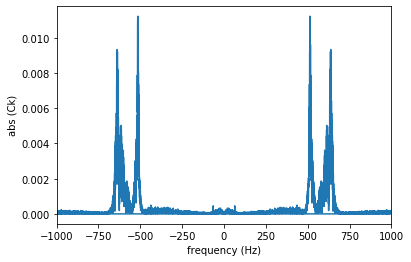

In [24]:
# 4)

# a)

from scipy.io import wavfile

fs, data = wavfile.read(
    "C:/Users/DaPC/Documents/GitHub/SvignBolg/Oblig3/attache/cuckoo.wav"
)
fsamp = data[:, 0]  # select one out of two channels
N = data.shape[0]  # number of samples
T = N / fs
t = np.linspace(0, T, N)

Ck = (1 / N) * np.fft.fft(fsamp)
freq = np.fft.fftfreq(N, T / N)

pl.plot(freq, np.abs(Ck))
pl.xlabel("frequency (Hz)")
pl.ylabel("abs (Ck)")
pl.xlim([-1000, 1000])
pl.show()

Gjør wavelet analyse i område (420 til 720)Hz

b ) Fordi vi kan høre opptil ca 20kHz, må lyden samples på minst 2x denne frekvensen for at den skal kunne rekonstrueres senere.

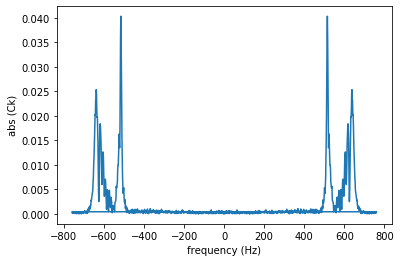

In [25]:
# c)

# cutting up the data

# play it safe and say we want frequencies up to 750Hz, x2 = 1500 sampling freq
# original is 44.1kHz, so we can pick out every 44.1k/1.5k sample

fsamp = fsamp[int(0.4 * fs) : int(1.1 * fs) : int(np.floor(44.1 / 1.5))]
N = len(fsamp)
T = 0.7
fs = N / T

Ck = (1 / N) * np.fft.fft(fsamp)
freq = np.fft.fftfreq(N, T / N)

pl.plot(freq, np.abs(Ck))
pl.xlabel("frequency (Hz)")
pl.ylabel("abs (Ck)")
pl.show()


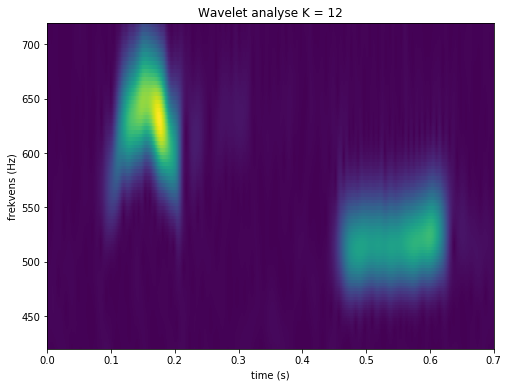

In [28]:
# g)

freq = np.logspace(np.log10(420), np.log10(720), 100)
diag = waveletDiagram(2 * np.pi * freq, 12, fsamp, T, fs, N) #

t = np.linspace(0, T, N)

t, freq = np.meshgrid(t, freq)

pl.figure(figsize=(8, 6))
pl.pcolormesh(t, freq, np.abs(diag))
pl.title("Wavelet analyse K = 12")
pl.xlabel("time (s)")
pl.ylabel("frekvens (Hz)")

pl.show()